In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
from plot_utils import extract_rewards_from_run_dir, eval_random_agent
import pandas as pd
result_dirs = {
        "CARLCartPoleContinuous" : ["results/hydra/multirun/2024-02-08/13-15-57","tau", [0.002     , 0.0033362 , 0.00556512, 0.00928318, 0.01548527, 0.02583099, 0.04308869, 0.07187627, 0.11989685, 0.2       ], 200],
        "CARLBraxAnt": ["results/hydra/multirun/2024-02-07/20-31-42","mass_torso",[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 1000],
        "CARLMountainCarContinuous"  : ["results/hydra/multirun/2024-02-09/18-52-53","power", [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10], 999],
        "CARLPendulum" : ["results/hydra/multirun/2024-02-09/13-33-44","l", [ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,   0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ], 200]
}
                                         
# measure performance of a random agent
"""
random_performance_df = pd.DataFrame(columns=["Environment", "context_value", "reward"])
for env_name, (dir, context_name, context_values, max_steps) in result_dirs.items():
    for context_value in context_values:
        random_performance = eval_random_agent(env_name, context_name, context_value, max_steps)
        random_performance_df = random_performance_df._append({"Environment": env_name, "context_value": context_value, "reward": random_performance}, ignore_index=True)
        print(f"Random performance for {env_name} with context value {context_value} is {random_performance}")
random_performance_df.to_csv("plots/random_performance.csv", index=False)
"""
# load it back
random_performance_df = pd.read_csv("plots/random_performance.csv")


env_name :  CARLCartPoleContinuous


/tmp/ipykernel_245790/4143314666.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  random_performance_df = random_performance_df._append({"Environment": env_name, "context_value": context_value, "reward": random_performance}, ignore_index=True)


Random performance for CARLCartPoleContinuous with context value 0.002 is 197.84
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.0033362 is 143.84
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.00556512 is 100.68
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.00928318 is 60.72
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.01548527 is 31.48
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.02583099 is 21.68
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.04308869 is 10.3
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.07187627 is 6.86
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous

'\n# load it back\nrandom_performance_df = pd.read_csv("plots/random_performance.csv")\n'

In [49]:
intra_extra = {
        "CARLCartPoleContinuous" : {"intra":[  0.00928318, 0.01548527, 0.02583099, 0.04308869,], "extra":[0.002     , 0.0033362 , 0.00556512, 0.07187627, 0.11989685, 0.2 ]},
        "CARLBraxAnt": {"intra":[30, 40, 50, 60, 70,], "extra":[1, 10, 20, 80, 90, 100]},
        "CARLMountainCarContinuous"  : {"intra":[-4, -2, 0, 2, 4], "extra":[-10, -8, -6,6, 8, 10]},
        "CARLPendulum" : {"intra":[ 0.1       ,  0.21544347,   0.46415888,  1.      ], "extra":[0.01      ,  0.02154435,  0.04641589, 2.15443469,  4.64158883, 10.]},
}


In [62]:

# concat all rewards, normalize using random and default agents
df_list = []
for env, (dir, _, _, _)  in result_dirs.items():
    print(f"Environment: {env}")
    
    reward_df = extract_rewards_from_run_dir(dir, environment_name=env)
    # normalize the rewards
    # loop over context_mode and context_values
    for context_value in reward_df["context_value"].unique():
        default_performance = reward_df[(reward_df["context_mode"] == "default") & (reward_df["context_value"] == context_value)]["reward"]
        default_performance = default_performance.mean()
        for context_mode in reward_df["context_mode"].unique():
            # find the random performance for this context
            # Create boolean masks for the conditions
            condition_mask = (reward_df["context_mode"] == context_mode) & (reward_df["context_value"] == context_value)

            # Apply the conditions and perform the calculation
            reward_df.loc[condition_mask, "reward"] = (reward_df.loc[condition_mask, "reward"] - random_performance) / (default_performance - random_performance)
    reward_df["Environment"] = env
    df_list.append(reward_df)

reward_df = pd.concat(df_list)




Environment: CARLCartPoleContinuous


/home/ndirt/dev/automl/meta_rl/scripts/plot_utils.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append(


Environment: CARLMountainCarContinuous


/home/ndirt/dev/automl/meta_rl/scripts/plot_utils.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append(


Environment: CARLPendulum


/home/ndirt/dev/automl/meta_rl/scripts/plot_utils.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append(


In [63]:
# loop over rows in reward_df
for i, row in reward_df.iterrows():
    env = row["Environment"]
    context_value = row["context_value"]
    context_value = float(context_value)
    reward = row["reward"]
    if context_value in intra_extra[env]["intra"]:
        reward_df.loc[i, "intra_extra"] = "intra"
    elif context_value in intra_extra[env]["extra"]:
        reward_df.loc[i, "intra_extra"] = "extra"
    else:
        raise ValueError(f"Context value {context_value} is not in either intra or extra for environment {env}")

reward_df["intra_extra"].value_counts()

intra_extra
extra    18540
intra    12460
Name: count, dtype: int64

In [127]:
filtered_reward_df = reward_df[reward_df["Environment"] == "CARLPendulum"]
filtered_reward_df = filtered_reward_df[filtered_reward_df["intra_extra"] == "intra"]

In [99]:
reward_df["Environment"].unique()

array(['CARLCartPoleContinuous', 'CARLMountainCarContinuous',
       'CARLPendulum'], dtype=object)

In [128]:
filtered_reward_df

,context_mode,seed,context_value,reward,Environment,intra_extra
60,default,9,0.1,0.316938,CARLPendulum,intra
61,default,9,0.1,1.872627,CARLPendulum,intra
62,default,9,0.1,0.713340,CARLPendulum,intra
63,default,9,0.1,0.341479,CARLPendulum,intra
64,default,9,0.1,0.267494,CARLPendulum,intra
...,...,...,...,...,...,...
9935,explicit,8,1.0,1.038863,CARLPendulum,intra
9936,explicit,8,1.0,1.043929,CARLPendulum,intra
9937,explicit,8,1.0,1.035912,CARLPendulum,intra
9938,explicit,8,1.0,0.806819,CARLPendulum,intra


In [129]:
# put scores in a dict of shape {context_mode: np.array(n_seeds, n_envs)}
algo_scores = {}
for context_mode in filtered_reward_df["context_mode"].unique():
    # get a numpy array of the scores for each algorithm, of shape (n_seeds, n_envs)
    scores = filtered_reward_df[filtered_reward_df["context_mode"] == context_mode].pivot_table(index="seed", columns=["Environment","context_value"], values="reward").to_numpy()
    algo_scores[context_mode] = scores

In [123]:
for context_mode, scores in algo_scores.items():
    print(f"Context mode: {context_mode}")
    print(f"score shape: {scores.shape}")
    print(scores)

Context mode: default
score shape: (10, 6)
[[ 0.8039301   0.99221689  1.02743917  0.7148052   1.6220308   0.8061886 ]
 [ 1.39458174  1.48200741  1.23987447  1.82730929  0.85599127  1.90810575]
 [ 0.69326344  0.9468646   0.87129762 -0.63665554  0.91693574 -0.33067047]
 [ 1.01802627  0.9959439   1.11604816  0.03149027  0.82521507  2.23024503]
 [ 0.90737415  0.95293211  0.75856334  0.27026819  1.11482356  0.78062143]
 [ 1.0470774   0.87662735  1.18176242  1.42759793  0.73631541  0.86676627]
 [ 1.30987359  1.09235454  1.28091459  0.90467442  0.59700621  0.73106301]
 [ 0.73815766  0.84477285  0.93339576  1.17713754  0.45722413  1.44131505]
 [ 0.95061038  0.87032166  0.95905559  2.14322062  1.68801182  0.26734436]
 [ 1.13710526  0.9459587   0.63164887  2.14015208  1.18644598  1.29902099]]
Context mode: hidden
score shape: (10, 6)
[[ 0.24380559  0.2690136   0.23478036  2.3118971   0.42615004  1.00795875]
 [ 0.23237142  0.26790669  0.23960205  2.18975836  0.12590181 -0.17100481]
 [ 0.23535977 

In [87]:
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils
import numpy as np

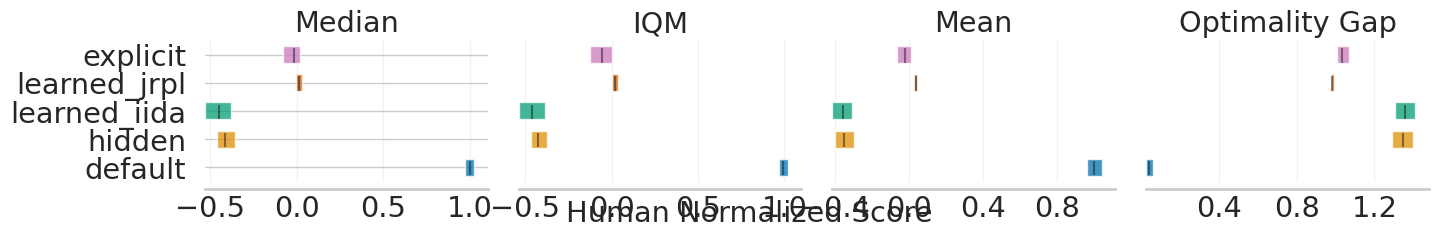

In [130]:
## Aggregate metrics with 95% Stratified Bootstrap CIs

# Load ALE scores as a dictionary mapping algorithms to their human normalized
# score matrices, each of which is of size `(num_runs x num_games)`
algorithms = list(algo_scores.keys())

aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  algo_scores, aggregate_func, reps=50000)
fig, axes = plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
  algorithms=algorithms, xlabel='Human Normalized Score')

<Axes: xlabel='P(X > Y)', ylabel='Algorithm X'>

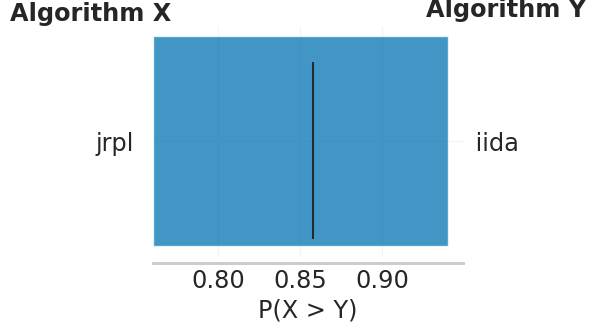

In [131]:
# Probability of Improvement

# Load ProcGen scores as a dictionary containing pairs of normalized score
# matrices for pairs of algorithms we want to compare
"""
num_runs, num_games = 10, 10
algorithm_pairs = {algo_pair: (np.random.rand(num_runs, num_games),
                                        np.random.rand(num_runs, num_games))
                            for algo_pair in [('DQN (Nature), DQN (Adam)'),
                                                ('C51, REM'), ('Rainbow, IQN')]}
"""
# Probability of Improvement

# Load ProcGen scores as a dictionary containing pairs of normalized score
# matrices for pairs of algorithms we want to compare
algorithm_pairs = {'jrpl, iida': (algo_scores['learned_jrpl'], algo_scores['learned_iida'])}

average_probabilities, average_prob_cis = rly.get_interval_estimates(
  algorithm_pairs, metrics.probability_of_improvement, reps=2000)
plot_utils.plot_probability_of_improvement(average_probabilities, average_prob_cis)


In [44]:
#print(algorithm_pairs['DQN (Nature), DQN (Adam)'])
print(len(algorithm_pairs['jrpl vs iida']))

2


<Axes: xlabel='Human Normalized Score $(\\tau)$', ylabel='Fraction of runs with score $> \\tau$'>

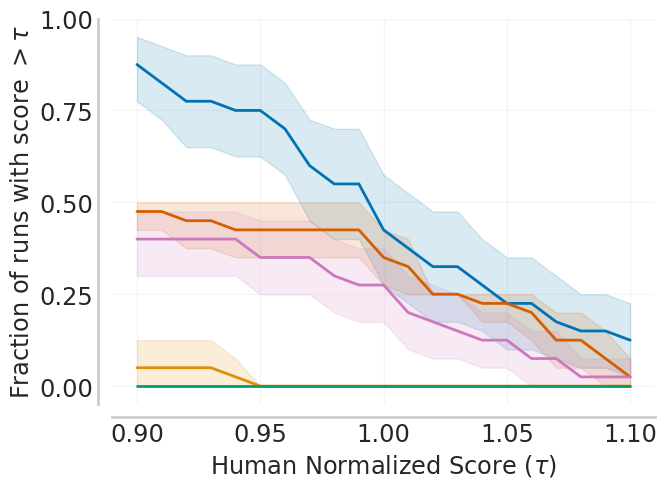

In [132]:
## Performance Profiles
import matplotlib.pyplot as plt
import seaborn as sns
# Load ALE scores as a dictionary mapping algorithms to their human normalized
# score matrices, each of which is of size `(num_runs x num_games)`.

# Human normalized score thresholds
atari_200m_thresholds = np.linspace(0.9, 1.1, 21)
score_distributions, score_distributions_cis = rly.create_performance_profile(
    algo_scores, atari_200m_thresholds)
# Plot score distributions
fig, ax = plt.subplots(ncols=1, figsize=(7, 5))
plot_utils.plot_performance_profiles(
  score_distributions, atari_200m_thresholds,
  performance_profile_cis=score_distributions_cis,
  colors=dict(zip(algorithms, sns.color_palette('colorblind'))),
  xlabel=r'Human Normalized Score $(\tau)$',
  ax=ax)